Toy Data Generator

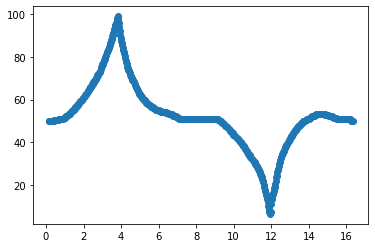

(551, 2)


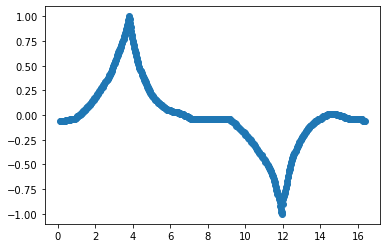

(900, 2)
(900, 2)


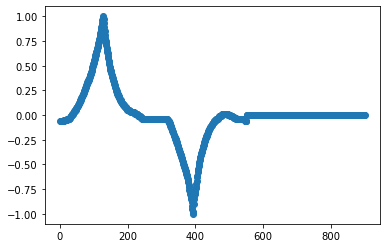

(900, 4)
(900, 4)
(900, 4)
405424.037968657
405424.037968657
(900, 4, 2000)
404524.037968657
809826327.6383858
(900, 4, 2000)
404575.962031343
810089612.6555246
done


In [1]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sklearn.preprocessing
import random

# convert to numpy array
path = ''
morph = 'points'
filename = path+'csvs/'+morph+'.csv'
waveform = np.genfromtxt(filename, delimiter=',', skip_header = 1)
times = waveform[:,0]
values = waveform[:,1]
plt.scatter(times,values)
plt.show()
plt.close()
print (np.shape(waveform))

# normalise amplitude
normed_waveform = waveform
normed_waveform[:,1] = sklearn.preprocessing.minmax_scale(waveform[:,1], feature_range=(-1,1))
times = normed_waveform[:,0]
values = normed_waveform[:,1]
plt.scatter(times,values)
plt.show()
plt.close()
waveform = normed_waveform

# Pad with zeros up to 900,2 shape
window = 900
shape = np.shape(waveform)
padded_waveform = np.zeros((window, 2))
padded_waveform[:shape[0],:shape[1]] = waveform
print(np.shape(padded_waveform))

# convert x axis to numbered bins
timeaxis = np.arange(start=1, stop=window+1, step=1)
padded_waveform[:,0] = timeaxis
print(np.shape(padded_waveform))
times = padded_waveform[:,0]
values = padded_waveform[:,1]
plt.scatter(times,values)
plt.show()
plt.close()
waveform = padded_waveform

# Transforming a timeseries to create a mock TDI timeseries

# turning waveform into a 3 channel array (t, X, Y, Z)
TDI = np.c_[ waveform, np.zeros(window), np.zeros(window) ]
print (np.shape(TDI))

# calculating Y channel as a half inversion of X shifted by 20 time bins
for i in range (0,900):
    TDI[i,2] = -0.5*TDI[(i-2) % 899,1]

# calculating Z channel as a timeshift combination of X and Y for Glitches
TDI_G = TDI
for i in range (0,900):
    TDI_G[i,3] = TDI_G[(i-3) % 899,1]*TDI_G[(i-1) % 899,2]
    
print (np.shape(TDI_G))
t = TDI_G[:,0]
x = TDI_G[:,1]
y = TDI_G[:,2]
z = TDI_G[:,3]
plt.scatter(t,x)
plt.scatter(t,y)
plt.scatter(t,z)
# plt.show()
# plt.savefig(path+'plots/'+morph+'_G1.png', transparent=True)
plt.close()

# calculating Z channel as a timeshift combination of X and Y for Signals
TDI_S = TDI
for i in range (0,900):
    TDI_S[i,3] = 2*TDI_S[(i+1)%899,1]*0.4*TDI_S[(i+1) % 899,2]
    
print (np.shape(TDI))
t = TDI_S[:,0]
x = TDI_S[:,1]
y = TDI_S[:,2]
z = TDI_S[:,3]
plt.scatter(t,x)
plt.scatter(t,y)
plt.scatter(t,z)
# plt.show()
# plt.savefig(path+'plots/'+morph+'_S1.png', transparent=True)
plt.close()

print (np.sum(TDI_S))
print (np.sum(TDI_G))

# Converting mock tdi into a varied dataset
# Signal

TDI = TDI_S

bigarray = TDI
for j in range (1999):
    TDIshift = np.empty_like(TDI)
    n = random.randint(0, 200)
    
    for i in range (0,899):
        # shifting all time spots by a random number of bins
        TDIshift[i,:] = TDI[(i + n) % 899,:]
        
    # randomly inverting signal or not
    r=random.choice([-1,1])
    TDIshift[:,1] = r*TDIshift[:,1]
    TDIshift[:,2] = r*TDIshift[:,2]
    TDIshift[:,3] = r*TDIshift[:,3]
    # add to big array and write label (glitch/signal,shape) to separate array
    bigarray = np.dstack((bigarray, TDIshift))

print (np.shape(bigarray))
print (np.sum(TDIshift))
print (np.sum(bigarray))

np.save(path+'npys/'+'F2/'+morph+'_S.npy', bigarray)

# Converting mock tdi into a varied dataset
# Glitch

TDI = TDI_G

bigarray = TDI
for j in range (1999):
    TDIshift = np.empty_like(TDI)
    n = random.randint(0, 200)
    
    for i in range (0,899):
        # shifting all time spots by a random number of bins
        TDIshift[i,:] = TDI[(i + n) % 899,:]
        
    # randomly inverting signal or not
    r=random.choice([-1,1])
    TDIshift[:,1] = r*TDIshift[:,1]
    TDIshift[:,2] = r*TDIshift[:,2]
    TDIshift[:,3] = r*TDIshift[:,3]
    # add to big array and write label (glitch/signal,shape) to separate array
    bigarray = np.dstack((bigarray, TDIshift))

print (np.shape(bigarray))
print (np.sum(TDIshift))
print (np.sum(bigarray))

np.save(path+'npys/'+'F2/'+morph+'_G.npy', bigarray)

print ('done')

